In [1]:
import torch
import matplotlib.pyplot as plt

from data.imdb_dataset import Vocab, get_dataloader
from SEmodels.gcnn import GCNN
from SEutils.trainer import train_one_epoch, evaluate


In [2]:
IMDB_ROOT = "./data/aclImdb"  
BATCH_SIZE = 256
EPOCHS = 100
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
from data.imdb_dataset import IMDBDataset, Vocab

train_texts = [
    text for _, text in IMDBDataset(IMDB_ROOT, "train").samples
]

vocab = Vocab(min_freq=20)
vocab.build(train_texts)

print("Vocab size:", len(vocab))



Vocab size: 13606


In [4]:
train_loader = get_dataloader(
    IMDB_ROOT, "train", BATCH_SIZE, vocab
)
test_loader = get_dataloader(
    IMDB_ROOT, "test", BATCH_SIZE, vocab, shuffle=False
)

model = GCNN(len(vocab)).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


In [5]:
history = {"loss": [], "acc": [], "f1": []}

for epoch in range(EPOCHS):
    loss = train_one_epoch(
        model, train_loader, optimizer, DEVICE
    )
    metrics = evaluate(model, test_loader, DEVICE)

    history["loss"].append(loss)
    history["acc"].append(metrics["accuracy"])
    history["f1"].append(metrics["f1"])

    print(
        f"Epoch {epoch} | "
        f"Loss {loss:.4f} | "
        f"Acc {metrics['accuracy']:.4f} | "
        f"F1 {metrics['f1']:.4f}"
    )


Epoch 0 | Loss 0.6109 | Acc 0.7492 | F1 0.7556
Epoch 1 | Loss 0.4492 | Acc 0.8109 | F1 0.8174
Epoch 2 | Loss 0.3532 | Acc 0.8301 | F1 0.8149
Epoch 3 | Loss 0.2910 | Acc 0.8555 | F1 0.8517
Epoch 4 | Loss 0.2453 | Acc 0.8590 | F1 0.8637
Epoch 5 | Loss 0.2117 | Acc 0.8673 | F1 0.8657
Epoch 6 | Loss 0.1782 | Acc 0.8686 | F1 0.8703
Epoch 7 | Loss 0.1495 | Acc 0.8699 | F1 0.8714
Epoch 8 | Loss 0.1217 | Acc 0.8656 | F1 0.8672
Epoch 9 | Loss 0.1039 | Acc 0.8712 | F1 0.8709
Epoch 10 | Loss 0.0779 | Acc 0.8664 | F1 0.8612
Epoch 11 | Loss 0.0582 | Acc 0.8670 | F1 0.8642
Epoch 12 | Loss 0.0435 | Acc 0.8651 | F1 0.8668
Epoch 13 | Loss 0.0284 | Acc 0.8614 | F1 0.8581
Epoch 14 | Loss 0.0175 | Acc 0.8628 | F1 0.8636
Epoch 15 | Loss 0.0113 | Acc 0.8634 | F1 0.8628
Epoch 16 | Loss 0.0071 | Acc 0.8624 | F1 0.8629
Epoch 17 | Loss 0.0040 | Acc 0.8628 | F1 0.8637
Epoch 18 | Loss 0.0026 | Acc 0.8625 | F1 0.8624
Epoch 19 | Loss 0.0019 | Acc 0.8623 | F1 0.8630
Epoch 20 | Loss 0.0013 | Acc 0.8616 | F1 0.8621
Ep

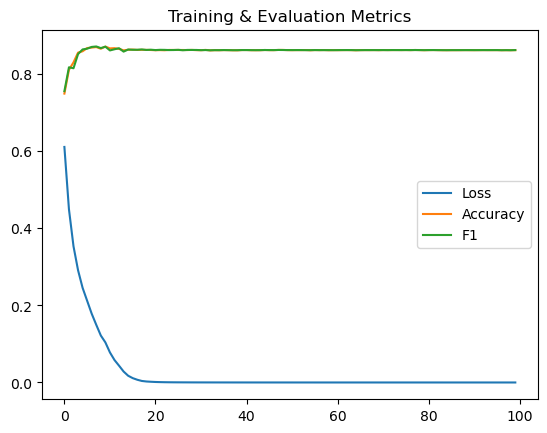

In [6]:
plt.plot(history["loss"], label="Loss")
plt.plot(history["acc"], label="Accuracy")
plt.plot(history["f1"], label="F1")
plt.legend()
plt.title("Training & Evaluation Metrics")
plt.show()



In [ ]:
import numpy as np
from SEutils.SEmetrics import compute_roc_pr

rocpr = compute_roc_pr(
    np.array(all_labels),
    np.array(all_probs),
)

plt.figure(figsize=(12, 5))

# ROC
plt.subplot(1, 2, 1)
plt.plot(rocpr["fpr"], rocpr["tpr"], lw=2,
         label=f"AUC = {rocpr['roc_auc']:.3f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# PR
plt.subplot(1, 2, 2)
plt.plot(rocpr["recall"], rocpr["precision"], lw=2,
         label=f"AP = {rocpr['ap']:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()

plt.tight_layout()
plt.show()
